## Linear regression

In [158]:
import numpy as np

%matplotlib inline
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [198]:
points = np.genfromtxt('data.csv', delimiter=',')
def linear_regression():
    # Step # 1 - Extract data
    points = np.genfromtxt('data.csv', delimiter=',')
    
    # Step # 2 - Define hyperparameters
    
    ## Learning rate
    learning_rate = 0.0001
    
    ## Coefficients y = a * x + b
    init_a = 0
    init_b = 0
    
    ## number of iterations
    num_iterations = 10000
    
    # Step 3 - model training
    
    print(
        'Start learning at a = {0}, b = {1}, error = {2}'.format(
            init_a,
            init_b,
            compute_error(init_a, init_b, points)
        )
    )
    
    a, b = gradient_descent(init_a, init_b, points, learning_rate, num_iterations)
    
    print(
        'End learning at a = {0}, b = {1}, error = {2}'.format(
            a,
            b,
            compute_error(a, b, points)
        )
    )
    
    return a, b


def compute_error(a, b, points):
    '''
        Computes Error = 1/N * sum((y - (ax + b))^2)
    '''
    error = 0
    N = len(points)
    
    for i in range(N):
        x = points[i, 0]
        y = points[i, 1]
        
        error += ((a * x + b)-y) ** 2

    return error / N


def gradient_descent(starting_a, starting_b, points, learning_rate, num_iterations):
    '''
        Performs gradient step num_iterations times
        in order to find optimal a, b values
    '''
    a = starting_a
    b = starting_b
    
    for i in range(num_iterations):
        a, b = gradient_step2(a, b, points, learning_rate)
    
    return a, b
    
def gradient_step1(current_a, current_b, points, learning_rate):
    '''
        Updates a and b in antigradient direction
        with given learning_rate
    '''
    a = current_a
    b = current_b
    
    a_gradient = 0
    b_gradient = 0
    
    N = len(points)
    
    for i in range(N):
        x = points[i, 0]
        y = points[i, 1]
        
        a_gradient += (2 / N) * x * ((a * x + b)-y)
        b_gradient += (2 / N) * ((a * x + b)-y)
    
    
    a = current_a - learning_rate * a_gradient
    b = current_b - learning_rate * b_gradient
    
    return a, b

def gradient_step2(current_a, current_b, points, learning_rate):
    '''
        Updates a and b in antigradient direction
        with given learning_rate
    '''
    a = current_a
    b = current_b
    
    a_gradient = 0
    b_gradient = 0
    
    N = len(points)
   
    random_ind = np.random.randint(points.shape[0])
    
    x = points[random_ind, 0]
    y = points[random_ind, 1]
        
    a_gradient =  (2 / N) * x * ((a * x + b)-y)
    b_gradient =  (2 / N) * ((a * x + b)-y)
    
    a = current_a - learning_rate * a_gradient
    b = current_b - learning_rate * b_gradient
    
    return a, b
    

In [200]:
a, b = linear_regression()

Start learning at a = 0, b = 0, error = 5565.107834483211
End learning at a = 1.5067027971379214, b = 0.035745733083431534, error = 114.58781620440406


## Plot Cost funstion

In [31]:
def plot_decorator(f):
    points = np.genfromtxt('data.csv', delimiter=',')
    
    return lambda a, b: f(a, b, points)


cost = plot_decorator(compute_error)

In [32]:
A = np.linspace(-10, 12, 40)
B = np.linspace(-10, 12, 40)

A, B = np.meshgrid(A, B)
E = cost(A, B)

Text(0.5,0,'cost')

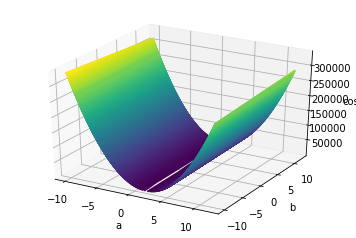

In [33]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(A, B, E, 1000)
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('cost')

## Plot data and learned function

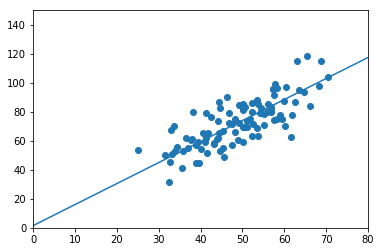

In [191]:
X = points[:, 0]
Y = points[:, 1]

plt.xlim(0, 80)
plt.ylim(0, 150)
plt.scatter(X, Y)

params = np.linspace(0, 150, 10)

plt.plot(params, a * params + b)

plt.show()


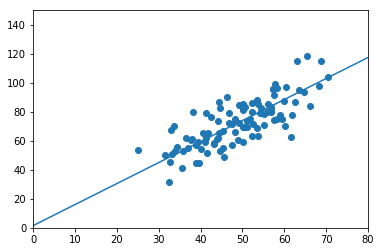

In [192]:
X = points[:, 0]
Y = points[:, 1]

plt.xlim(0, 80)
plt.ylim(0, 150)
plt.scatter(X, Y)

params = np.linspace(0, 150, 10)

plt.plot(params, a * params + b)

plt.show()

[ 32.50234527  53.42680403  61.53035803  47.47563963  59.81320787
  55.14218841  52.21179669  39.29956669  48.10504169  52.55001444
  45.41973014  54.35163488  44.1640495   58.16847072  56.72720806
  48.95588857  44.68719623  60.29732685  45.61864377  38.81681754
  66.18981661  65.41605175  47.48120861  41.57564262  51.84518691
  59.37082201  57.31000344  63.61556125  46.73761941  50.55676015
  52.22399609  35.56783005  42.43647694  58.16454011  57.50444762
  45.44053073  61.89622268  33.09383174  36.43600951  37.67565486
  44.55560838  43.31828263  50.07314563  43.87061265  62.99748075
  32.66904376  40.16689901  53.57507753  33.86421497  64.70713867
  38.11982403  44.50253806  40.59953838  41.72067636  51.08863468
  55.0780959   41.37772653  62.49469743  49.20388754  41.10268519
  41.18201611  50.18638949  52.37844622  50.13548549  33.64470601
  39.55790122  56.13038882  57.36205213  60.26921439  35.67809389
  31.588117    53.66093226  46.68222865  43.10782022  70.34607562
  44.49285

ValueError: Expected 2D array, got 1D array instead:
array=[ 46.73761941  46.2309665   55.14218841  56.13038882  39.55790122
  45.44053073  44.68719623  64.70713867  57.50444762  39.29956669
  50.03017434  63.61556125  38.81681754  56.86890066  59.37082201
  52.37844622  58.16847072  51.84518691  47.47563963  60.29732685
  36.43600951  48.10504169  55.80573336  52.21179669  33.64470601
  61.89622268  38.00548801  41.37772653  25.12848465  51.08863468
  43.87061265  38.11982403  57.36205213  40.16689901  60.26921439
  50.18638949  50.03957594  38.95476907  43.31828263  49.20388754
  33.86421497  48.14985889  62.49469743  44.49285588  42.43647694
  68.31936082  41.10268519  50.13548549  57.78822399  33.09383174
  50.55676015  53.42680403  40.59953838  65.41605175  61.53035803
  41.57564262  50.28283635  53.69163957  70.34607562  51.0887199
  34.3331247   66.18981661  41.18201611  53.66093226  56.72720806
  68.76573427  44.50253806].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.